In [1]:
import numpy as np 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense , Dropout
from tensorflow.keras.initializers import GlorotNormal , GlorotUniform , HeUniform , HeNormal
from tensorflow.keras import regularizers

In [4]:
(x_train , y_train) , (x_test , y_test) = cifar10.load_data()
class_labels = ['aeroplane' , 'aotomobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'truck' , 'ship']

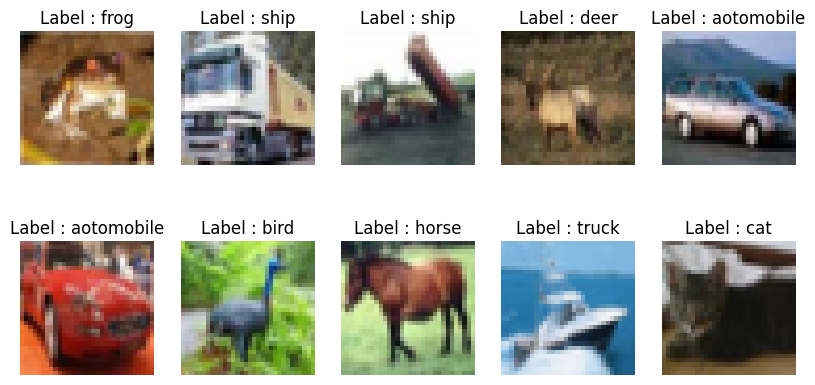

In [10]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(2,5 , figsize = (10,5))

for i , ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f'Label : {class_labels[y_train[i][0]]}' )
    ax.axis('off')

plt.show()

In [11]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
dropout_model = Sequential([
    Flatten(input_shape = (32,32,3,)),
    Dense(512 , activation='relu'),
    Dropout(0.1),
    Dense(256 , activation='relu'),
    Dropout(0.1),
    Dense(128 , activation='relu'),
    Dense(10 , activation='softmax')

])

/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1731323337.151647   31116 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [16]:
dropout_model.compile(optimizer='adam' , loss= 'sparse_categorical_crossentropy' , metrics=  ['accuracy'])

In [20]:
drop = dropout_model.fit(x_train , y_train , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3


2024-11-11 16:41:36.926841: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.2409 - loss: 2.0728 - val_accuracy: 0.3487 - val_loss: 1.7774
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.3429 - loss: 1.8101 - val_accuracy: 0.3923 - val_loss: 1.6805
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3760 - loss: 1.7267 - val_accuracy: 0.4191 - val_loss: 1.6297


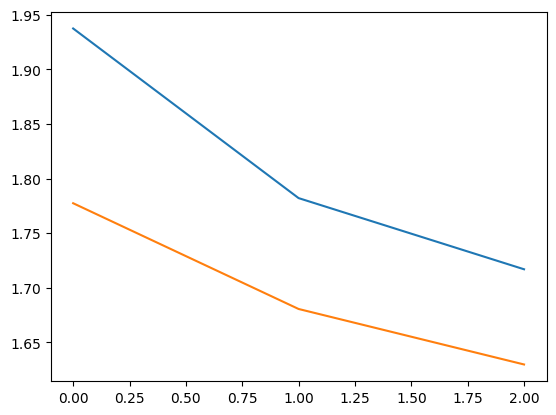

In [21]:
plt.plot(drop.history['loss'] , label = 'loss')
plt.plot(drop.history['val_loss'] , label = 'val_loss')

In [22]:
xavier_n_model = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(512 , activation= 'relu' , kernel_initializer= GlorotNormal),
    Dense(256 , activation= 'relu' , kernel_initializer= GlorotNormal),
    Dense(128 , activation= 'relu' , kernel_initializer= GlorotNormal) ,
    Dense(10,activation='softmax'  )
     
])

/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
xavier_n_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
xavier_n_model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])
xavier_n_model.fit(x_train,y_train , epochs= 1)

2024-11-11 16:50:39.251619: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.2746 - loss: 1.9938


In [27]:
xavier_u_model = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(512 , activation= 'relu' , kernel_initializer= GlorotUniform),
    Dense(256 , activation= 'relu' , kernel_initializer= GlorotUniform),
    Dense(128 , activation= 'relu' ) ,
    Dense(10,activation='softmax'  )
     
])

/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
xavier_u_model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])
xavier_u_model.fit(x_train,y_train , epochs= 1)

2024-11-11 16:52:33.947480: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.2634 - loss: 2.0222


In [29]:
he_u_model = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(512 , activation= 'relu' , kernel_initializer= HeUniform),
    Dense(256 , activation= 'relu' , kernel_initializer= HeUniform),
    Dense(128 , activation= 'relu' ) ,
    Dense(10,activation='softmax'  )
     
])
he_u_model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])
he_u_model.fit(x_train,y_train , epochs= 1)

/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-11 16:53:51.968363: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.2656 - loss: 2.0266


In [30]:
he_n_model = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(512 , activation= 'relu' , kernel_initializer= HeNormal),
    Dense(256 , activation= 'relu' , kernel_initializer= HeNormal),
    Dense(128 , activation= 'relu' ) ,
    Dense(10,activation='softmax'  )
     
])
he_n_model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])
he_n_model.fit(x_train,y_train , epochs= 1)

/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-11 16:54:36.936264: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.2705 - loss: 2.0159


In [33]:
l1_model = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(512 , activation= 'relu' , kernel_regularizer=  regularizers.l1(0.001)),
    Dense(256 , activation= 'relu' , kernel_regularizer = regularizers.l1(0.001)),
    Dense(128 , activation= 'relu' ) ,
    Dense(10,activation='softmax'  )
     
])
l1_model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])
l1_model.fit(x_train,y_train , epochs= 1)

/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.2107 - loss: 6.3269


In [34]:
l2_model = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(512 , activation= 'relu' , kernel_regularizer=  regularizers.l2(0.001)),
    Dense(256 , activation= 'relu' , kernel_regularizer = regularizers.l2(0.001)),
    Dense(128 , activation= 'relu' ) ,
    Dense(10,activation='softmax'  )
     
])
l2_model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])
l2_model.fit(x_train,y_train , epochs= 1)

/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.2753 - loss: 2.3963
